# Introduction

This coursework uses a gold medal dataset called Company Bankruptcy Prediction from Kaggle.com with the usability score equal to 10. The Taiwan Economic Journal gathered these data from 1999 to 2009.  Also, the Taiwan Stock Exchange is involved to define company bankruptcy.

The dataset contains 6819 entries. Each entry has 96 attributes, which are conventional accounting ratios to demostrate a company's financial stability.

In this coursework, we are going to explore the characteristics of bankruptcy company, and use applied machine learning to predict companies bankruptcy. We are going to analyse the dataset in the following steps: 

Firstly, we will clean the dataset and go through Basic analysis to have a basic knowledge of the dataset.  

Secondly, we will use 7 differences machine learning classifiers to predict the company bankruptcy. And then try to find a good model. 

Finally, to improve the predictiotion, we will use 3 Deep learning models to predict the company bankruptcy. And then try to find a best model among our results. 

In below, there is a table of content which maps the material from each class to the analysis provided in our report.

In [ ]:
data = [['Class 1',' Data clean including 1) handling missing data 2) text to sparse process 3) oversampling the minority class 4) data standardization'],
        ['Class 1', 'Basic Analysis including 1) Boxplot 2) Correlation Coefficient analysis'],
        ['Class 2 & 3 ','Basic Classifier : 1) Basic Logistic Classifier 2) Decision Tree 3)Random Forest '],
        ['Class 2 & 3 ','Adance Classifier : 1) Support Vector Machine 2) Gradient Boosting 3)XG Boosting 4) Ensemble Modelling'],
        ['Class 4','Not included as there is not textual data in our dataset'],
        ['Class 5','Deep learning : 1) Simple Deep Learning Network 2) Weighted/Cost sensitive Deep Learning Network 3) Hyper-parametrization']]
        
print(data[0],'\n',
data[1],'\n',
data[2],'\n',
data[3],'\n',
data[4],'\n',
data[5],'\n',)

['Class 1', ' Data clean including 1) handling missing data 2) text to sparse process 3) oversampling the minority class 4) data standardization'] 
 ['Class 1', 'Basic Analysis including 1) Boxplot 2) Correlation Coefficient analysis'] 
 ['Class 2 & 3 ', 'Basic Classifier : 1) Basic Logistic Classifier 2) Decision Tree 3)Random Forest '] 
 ['Class 2 & 3 ', 'Adance Classifier : 1) Support Vector Machine 2) Gradient Boosting 3)XG Boosting 4) Ensemble Modelling'] 
 ['Class 4', 'Not included as there is not textual data in our dataset'] 
 ['Class 5', 'Deep learning : 1) Simple Deep Learning Network 2) Weighted/Cost sensitive Deep Learning Network 3) Hyper-parametrization'] 



# Part 1  Data clean and basic analysis

In this section, we focus on basic analysis on dataset by boxplots and correlation coeffient to understand our dataset first. Also, we clean the dataset which includes:1) handling the missing data 2) convert the textual data into numerical data 3) handling the imbalance dataset 4) data standardization

In [ ]:
# load Libraries
# core quantitative analysis packages
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt # default package
%matplotlib inline

# machine learning

# models ordered in order of usage in the worksheet
# Standardize features
from sklearn.preprocessing import StandardScaler
# machine learning packages 
from sklearn.model_selection import train_test_split
# finding features packages 
from sklearn.feature_selection import SelectKBest, f_classif


In [ ]:
# import dataset 
df = pd.read_csv('/content/data.csv') 

In [ ]:
# briefly view the dataset
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


## Boxplots

In [ ]:
# seperate the dataset into bankruptcy companies(0) and no bankruptcy companies(1)
grouped = df.groupby(df['Bankrupt?'])

df_not_bankrupt = grouped.get_group(0)

df_bankrupt = grouped.get_group(1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


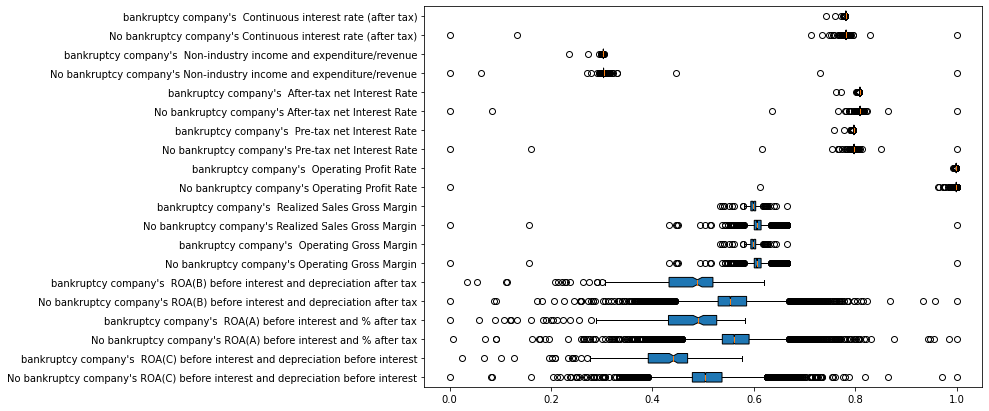

In [ ]:
# boxplot to have an overview of the differences between the ratios of bankruptcy companies and the ratios of not bankruptcy companies
data,data_names = [],[]

for i in df.columns :
    if i != 'Bankrupt?':
        data.append(df_not_bankrupt[i]) 
        data.append(df_bankrupt[i]) 
        data_names.append("No bankruptcy company's" + i) 
        data_names.append("bankruptcy company's " + i) 
        
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[:20], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[:20])

plt.show()

This boxplot has suggestes that ROA(A), ROA(B), and ROA(C) may be helpful to disguinish the bankruptcy company. Because the companies are not bankrupt have higher mediam, right skewed and smaller spread of IQR than the companies are bankrupt, they have higher and stable return on their assets than the companies are bankrupt. So, a company can use the return on asset to pay its annual debts. 

This can be found in Operating Gross Margin too. Higher the Operating Gross Margin indicates the higher earning relatively to net expense. So, the companies are not bankrupt have shown higher profitabiltiy than the companies are bankrupt

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


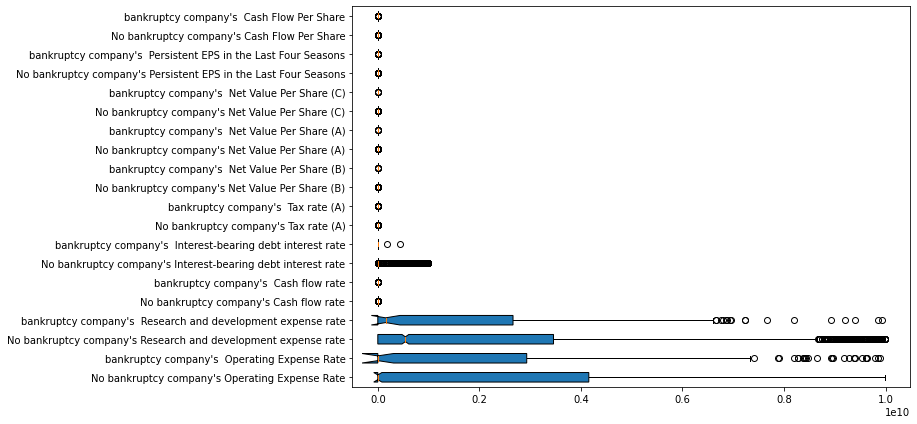

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[20:40], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[20:40])

plt.show()

This boxplot has shown the companies are not bankrupt have spend more on developement and research than the companies are bankrupt, as they have higher mediam, right skewed and larger IQR than the companies are bankrupt. The company will survive longer if it spends extra money on future development. 

Operating expense rate indicate how much does company spend on operation. This may not be helpful, as no bankrupt companies spense more on operation than the companies are bankrupt. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


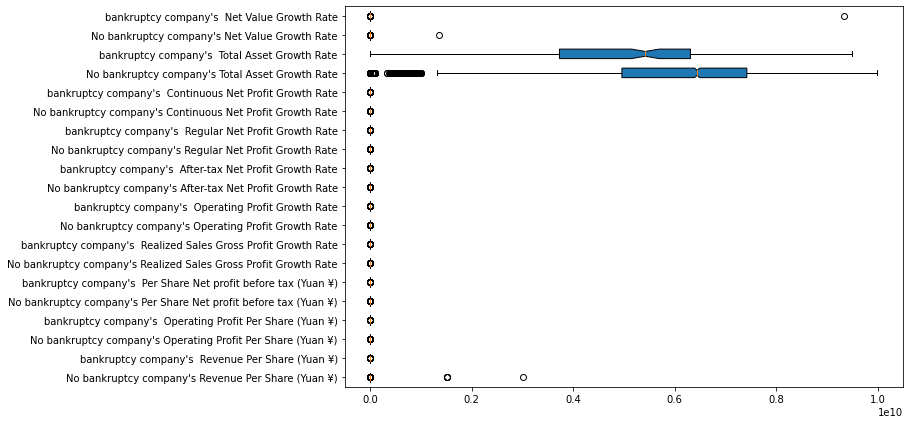

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[40:60], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[40:60])

plt.show()

This boxplot shown that has shown the companies are not bankrupt have higer asset growth than the companies are bankrupt, as they have higher mediam, right skewed and larger IQR than the companies are bankrupt. The higher the asset growth rate indicates higher future stock return, which can prevent the company goes bankruptcy by selling its shares to buy the debts. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


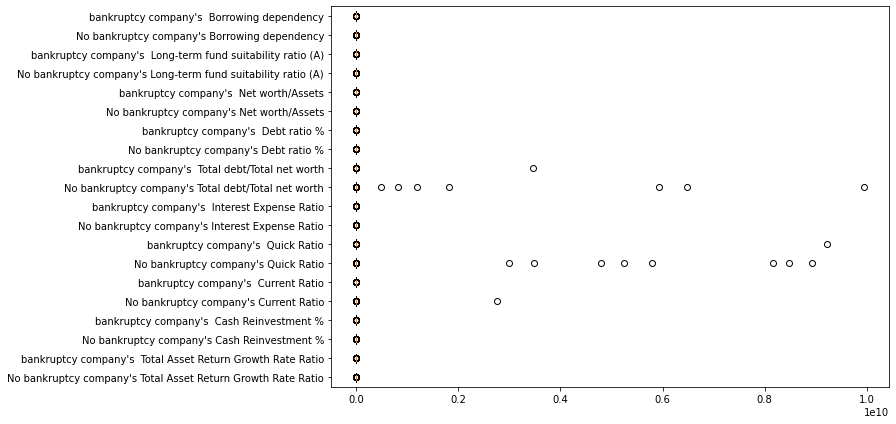

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[60:80], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[60:80])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


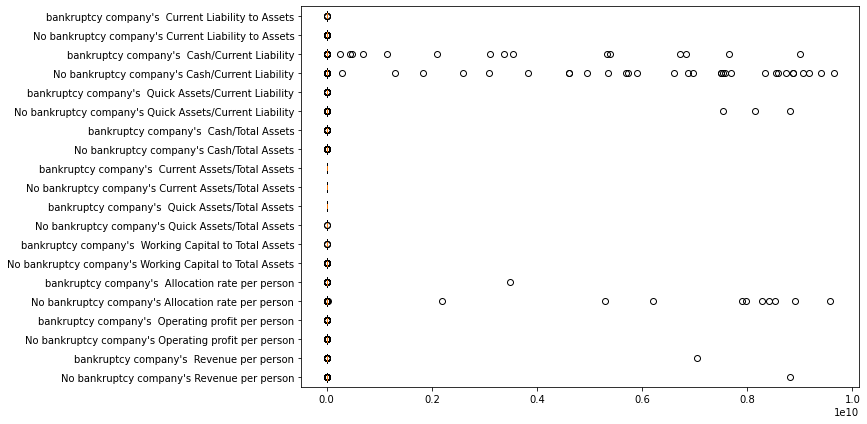

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[100:120], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[100:120])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


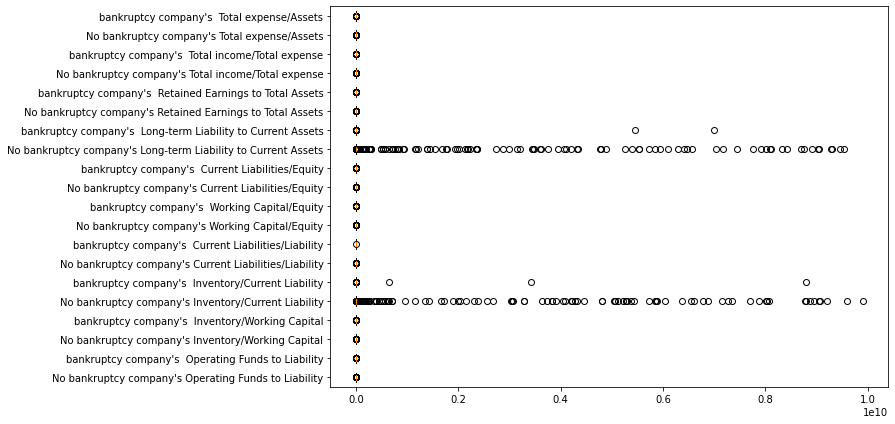

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[120:140], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[120:140])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


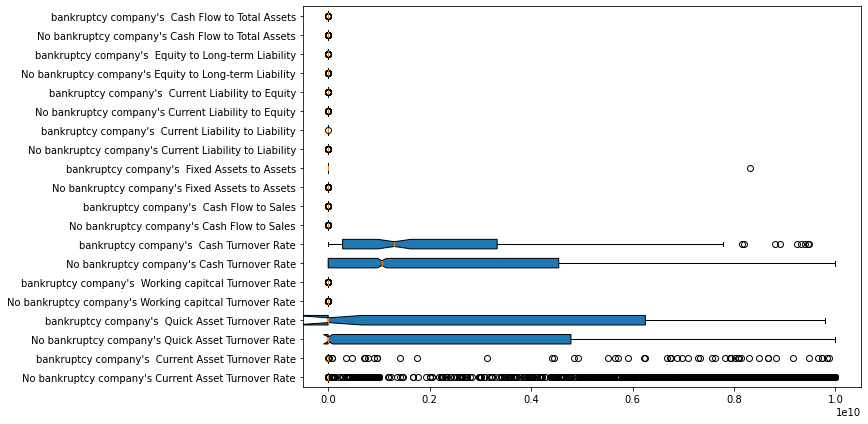

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[140:160], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[140:160])

plt.show()

This boxplot shown that has shown the companies are not bankrupt have higer cash turnover rate than the companies are bankrupt, as they have higher mediam, right skewed and larger IQR than the companies are bankrupt. The higher the cash turnover rate indicates the company can more quickly replenish its cash using its sales revenue to pay the debts, which can prevent the company goes bankruptcy.  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


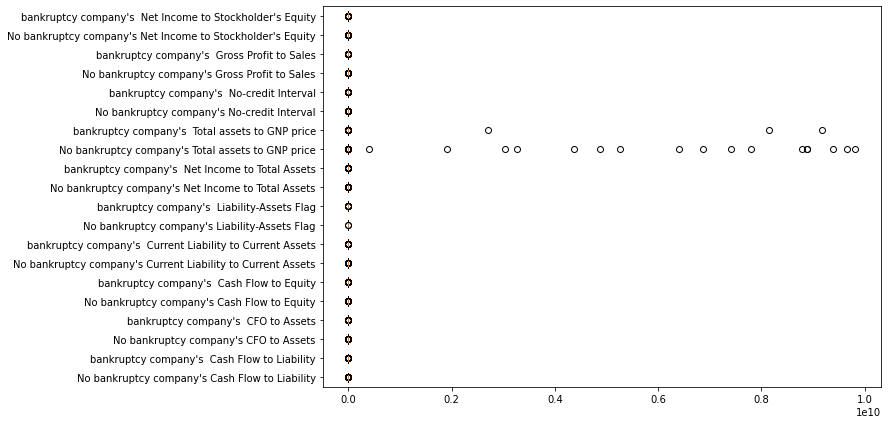

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[160:180], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[160:180])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


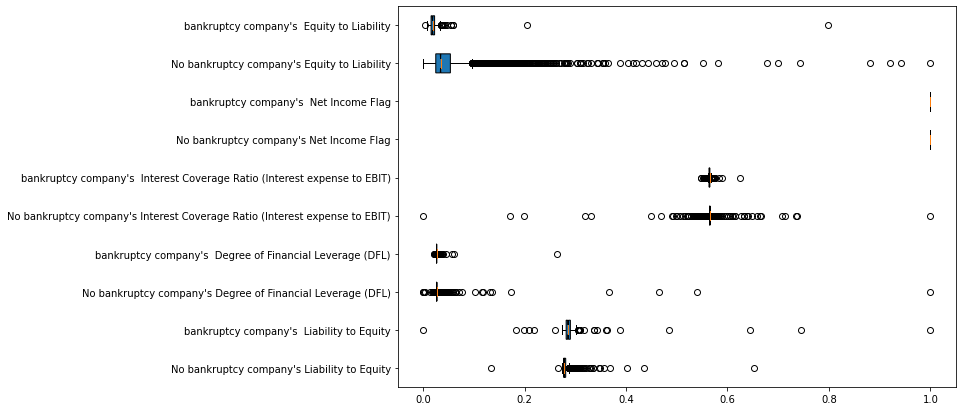

In [ ]:
# setup the figure of boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data[180:190], patch_artist = True,notch ='True', vert = 0)

# x-axis labels
ax.set_yticklabels(data_names[180:190])

plt.show()

This boxplot shown that has shown the companies are not bankrupt have higer equity to liability than the companies are bankrupt, as they have higher mediam, right skewed and larger IQR than the companies are bankrupt. The higher the equity to liability indicates the company has smaller proportion of loans than equity, which can prevent the company goes bankruptcy.

## correlation coefficient check

In [ ]:
corr_matrix = df.corr()
corr_matrix['Bankrupt?'].sort_values(ascending=False).head(10)

corr_dict = {
  "accounting ratio": corr_matrix.columns,
  "correlations": corr_matrix['Bankrupt?'].values,
  "absolute correlation" : map(abs,corr_matrix['Bankrupt?'].values),
}   

df_corr = pd.DataFrame(data=corr_dict)
df_corr.sort_values(by='absolute correlation', ascending=False).head(10)

,accounting ratio,correlations,absolute correlation
0,Bankrupt?,1.000000,1.000000
86,Net Income to Total Assets,-0.315457,0.315457
2,ROA(A) before interest and % after tax,-0.282941,0.282941
3,ROA(B) before interest and depreciation after...,-0.273051,0.273051
1,ROA(C) before interest and depreciation befor...,-0.260807,0.260807
38,Net worth/Assets,-0.250161,0.250161
37,Debt ratio %,0.250161,0.250161
19,Persistent EPS in the Last Four Seasons,-0.219560,0.219560
68,Retained Earnings to Total Assets,-0.217779,0.217779
43,Net profit before tax/Paid-in capital,-0.207857,0.207857


The table above has shown the top 10 accounting ratios which are significantly correlated to 'bankrupt? '

Debt ratio has positive correlations coefficient value, which means that it has positive relatinship to Bankrupt as Bankruptcy is denoted as 1.Converstly, other raitos have negative correlation coefficent relatinship to the bankrupt. 

Higher the debt ratio, indicate companies are bankrupt have to pay higher level of debt payments than the companies are not bankrupt. 

ROA(A), ROA(B), and ROA(C) has been further proven that help to examine whether a company is not bankrupt. 

Net income to total assets, Net profit before tax/Paid-in capitalis, and Per Share Net profit before tax are the profitability ratio.  the higher the ratio, indicates the company has greater ability in generating its revenue over a year. 

Net worth/ assets is used to shown margin of assets and liabilitiy as net worth is total assets minus total liabilities. higher the Net worth / assets indicate the company is solvent as it has relatively lower liabilties than its asset.

higher Persistent EPS in the Last Four Seasons is the profibility ratio. a higher EPS would suggest that a company is more valuable. If investors are comfortable paying a higher price for shares, then that could reflect strong profits or expectations of high profits. 

Retained Earnings to Total Assets indicates total retained earnings that the company generates compare to the total assets of the company at the end of the specific accounting period. So, it illustrate how much does company use retained earning to reinvest rather than pay dividend. This may help the company grow and survive longer. However, for the mature companies may have smaller retained earning as they use their profit to pay their shareholders, such as natural resource industries. 


## Data clean

In [ ]:
# briefly check dataset values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

This section of code has shown that there have no missing data as each attribute has 6819 entries and do not need word-to-sparse process as data are numerical. 

## Oversample the minority data (bankruptcy companies)

In [ ]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

This has shown that the dataset is highly imbalanced. As a result, there will be bias throughout the model's training process, with classes with more samples being favoured over classes with minori class. So, we need to oversample the bankruptcy companies' data to overcome this issue in our case. In the following, we have used Borderline-SMOTE to oversample our dataset. The the advantage of using this method is enable us to select the samples of data that belongs to the minority class. Also, this method can produce new synthetic samples and inherit the characteristerist of bankruptcy companies, because it extracts the feature of the minority class to produce the new samples.    

In [ ]:
# using Synthetic Minority Over-Sampling Technique or SMOTE to balance out our dataset
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
# install imblearn
#import sys
#!{sys.executable} -m pip install imblearn

In [ ]:
# define dataset
X = df.drop(columns = ['Bankrupt?']).to_numpy() # continuous data
y = df['Bankrupt?'].to_numpy() # binary data

#SMOTE With Selective Synthetic Sample Generation
# borderline-SMOTE for imbalanced dataset
oversample = BorderlineSMOTE()
# transform the dataset
X, y = oversample.fit_resample(X, y)


In [ ]:
# convert from array to panda.dataframe 
df_oversampled = pd.DataFrame(X, columns = [name for name in df.columns if name != 'Bankrupt?']  )
df_oversampled.insert(0, 'Bankrupt?', y)


In [ ]:
df_oversampled['Bankrupt?'].value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

On above, it shown that we have generated a balanced dataset.

In [ ]:
grouped_2 = df_oversampled.groupby(df_oversampled['Bankrupt?'])
df_not_bankrupt_2 = grouped_2.get_group(0)
df_bankrupt_2 = grouped_2.get_group(1)

In [ ]:
df_bankrupt_2.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6599.0,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,...,6599.000000,6.599000e+03,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.0,6599.000000
mean,1.0,0.419856,0.461287,0.462507,0.597579,0.597611,0.998681,0.796770,0.808719,0.303044,...,0.740566,6.187816e+07,0.623728,0.597577,0.828480,0.290128,0.027742,0.565153,1.0,0.021755
std,0.0,0.061657,0.081747,0.071162,0.012007,0.012012,0.000799,0.001234,0.001273,0.001143,...,0.064388,6.472331e+08,0.006854,0.012007,0.049610,0.037653,0.007592,0.005244,0.0,0.024842
min,1.0,0.024277,0.000000,0.033514,0.532906,0.532906,0.991888,0.757216,0.761550,0.235090,...,0.411809,1.323021e-04,0.587512,0.532907,0.000000,0.000000,0.020760,0.547146,1.0,0.003946
25%,1.0,0.390606,0.429011,0.433893,0.594298,0.594326,0.998749,0.796756,0.808693,0.302946,...,0.722382,2.036073e-03,0.622428,0.594294,0.831426,0.283014,0.026511,0.563669,1.0,0.016795
50%,1.0,0.435985,0.484452,0.482358,0.598650,0.598768,0.998876,0.797100,0.809040,0.303273,...,0.760748,4.983081e-03,0.623375,0.598649,0.836059,0.286043,0.026673,0.564664,1.0,0.018976
75%,1.0,0.463529,0.516856,0.510825,0.602886,0.602922,0.998946,0.797268,0.809196,0.303415,...,0.781476,1.156184e-02,0.623777,0.602884,0.838684,0.290155,0.026832,0.565939,1.0,0.021993
max,1.0,0.576951,0.582861,0.619091,0.665151,0.665151,0.999254,0.797761,0.809691,0.305396,...,0.819091,9.170000e+09,0.679654,0.665149,1.000000,1.000000,0.264577,0.624147,1.0,0.798122


In [ ]:
df_bankrupt.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.0,220.000000
mean,1.0,0.418503,0.456947,0.461483,0.598670,0.598717,0.998739,0.796590,0.808424,0.302609,...,0.738083,9.100000e+07,0.623541,0.598669,0.826008,0.293578,0.028443,0.564959,1.0,0.024832
std,0.0,0.081068,0.107674,0.091825,0.014595,0.014583,0.000709,0.003177,0.004174,0.005099,...,0.081092,8.436461e+08,0.006480,0.014595,0.075758,0.068479,0.016434,0.005907,0.0,0.054424
min,1.0,0.024277,0.000000,0.033514,0.532906,0.532906,0.991888,0.757216,0.761550,0.235090,...,0.411809,1.323021e-04,0.587512,0.532907,0.000000,0.000000,0.020760,0.547146,1.0,0.003946
25%,1.0,0.391703,0.431531,0.432665,0.593924,0.593915,0.998748,0.796831,0.808741,0.303015,...,0.719248,1.216905e-03,0.622732,0.593921,0.831277,0.282084,0.026519,0.563697,1.0,0.015828
50%,1.0,0.441330,0.490215,0.488597,0.598802,0.598899,0.998899,0.797156,0.809092,0.303347,...,0.766297,3.853295e-03,0.623555,0.598798,0.836707,0.285852,0.026689,0.564712,1.0,0.018662
75%,1.0,0.469276,0.526630,0.519153,0.603500,0.603493,0.998976,0.797338,0.809269,0.303444,...,0.789621,9.618748e-03,0.623854,0.603500,0.839661,0.290377,0.026779,0.565271,1.0,0.022721
max,1.0,0.576951,0.582861,0.619091,0.665151,0.665151,0.999254,0.797761,0.809691,0.305396,...,0.819091,9.170000e+09,0.679654,0.665149,1.000000,1.000000,0.264577,0.624147,1.0,0.798122


In comparison, we can see after oversampling the banrkupts companies data has increase to 6599, meanwhile the characteristics of the banrkupts companies data does not change significantly. 

## data standardization 

We see the mean not equal 0 and std smaller than 1 from the table on above. So, we need to standardize our dataset, data standardization is making sure the consistency when we comparing the each attributes in regression models. 

In [ ]:
# we can use the sklearn standardscale fot this 
scale = StandardScaler()

df_scale = scale.fit_transform(df_oversampled) # all the numerical data are standardised

df_sc = pd.DataFrame(df_scale, columns=df_oversampled.columns, index=df_oversampled.index)# transforms matrix back to a dataframe

df_sc.describe().round(2) # check it works .describe()

display(df_sc.describe())

# useful BEFORE MEASURING VARIABLE IMPORTANCE IN REGRESSION MODELS

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,13198.000000,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,...,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,13198.0,13198.000000
mean,0.000000,-2.067347e-16,-1.033673e-15,-2.411904e-16,-5.719659e-15,2.067347e-16,4.740092e-15,-2.336532e-16,1.699101e-15,-6.042682e-15,...,-1.481598e-15,4.306972e-18,3.184468e-15,2.411904e-16,-6.805016e-16,9.303060e-16,2.638020e-17,-3.943033e-15,0.0,0.000000
std,1.000038,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,0.0,1.000038
min,-1.000000,-6.250420e+00,-5.819008e+00,-6.359039e+00,-3.862165e+01,-3.866216e+01,-1.066145e+02,-8.584697e+01,-8.251225e+01,-3.771967e+01,...,-1.237023e+01,-7.497301e-02,-6.212982e+01,-3.862157e+01,-2.333912e+01,-1.032524e+01,-2.247105e+00,-5.559315e+01,0.0,-0.845203
25%,-1.000000,-4.808295e-01,-4.312993e-01,-4.409344e-01,-3.829384e-01,-3.819499e-01,1.369511e-02,5.239315e-03,7.049067e-03,-1.534143e-02,...,-3.226589e-01,-7.497301e-02,-7.466560e-02,-3.830592e-01,2.624907e-02,-2.445719e-01,-8.099938e-02,-8.280476e-02,0.0,-0.401094
50%,0.000000,6.700062e-02,1.746400e-01,1.118323e-01,-6.738051e-02,-6.810546e-02,2.585808e-02,3.682880e-02,3.550629e-02,1.195583e-02,...,2.252187e-01,-7.497301e-02,-1.234593e-02,-6.741867e-02,1.380967e-01,-1.059974e-01,-6.795238e-02,-9.902670e-03,0.0,-0.283685
75%,1.000000,5.475528e-01,5.734998e-01,5.615086e-01,3.783524e-01,3.787187e-01,3.349127e-02,5.261340e-02,4.831086e-02,2.331788e-02,...,5.795488e-01,-7.497301e-02,2.254960e-02,3.784013e-01,1.889195e-01,6.492527e-02,-5.900532e-02,5.003650e-02,0.0,0.025982
max,1.000000,7.221400e+00,5.553993e+00,6.119860e+00,2.543624e+01,2.546230e+01,1.368077e-01,2.186704e+01,1.949169e+01,8.662393e+01,...,3.584673e+00,1.877992e+01,3.746472e+01,2.543637e+01,4.622599e+00,2.590032e+01,7.909138e+01,4.275616e+01,0.0,23.271880


## Finding the feature by machine learning

split the dataset into Training set, validation test, and Test set

In [ ]:
y = df_sc['Bankrupt?']
X = df_sc.drop(columns=['Bankrupt?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) # split data into 80% training set and 20% test set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=84, test_size=0.5) # further split the test set into 10% validation set and 10% test set

We have split the dataset into 80% training set which allow the model have sufficient source to learn, and then improve its prediction performance. 

Furthermore, we have split the test set into 10% validation set and 10% test set. The validation set will use to fit-tune the model, and the test set will be used to see whether we have overfitting the model. 

In [ ]:
feature_selection=SelectKBest(f_classif,k=10).fit(X_train,y_train)      # k number of specified features
selected_features=X_train.columns[feature_selection.get_support()]
selected_features

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Net Income to Total Assets'],
      dtype='object')

The SelectKBest technique chooses features based on the top k scores(further exlanation in part 3).

We can see the results are the same as our correlation coeffient analysis. 
Therefore,we think it is reasonable to use the these 10 features for our later research. 

##Save the 10 selected features dataset 

In [ ]:
# save the data set with 10 selected features for regression
#df = df_sc.copy()
#df_sc_10features= df.drop(columns=[column for column in df_sc.columns if column not in selected_features and column != 'Bankrupt?'])
#df_sc_10features.to_csv('data_oversampled_standardized_10features.csv',index = False)

# Part 2 Basic Logistic Classifier and More Advanced Classifier models
We now use the oversampled and standardized data with the ten selected features to do classifier machine learning.

Firstly, we leverage several models to learn and train. Secondly, we use our models to predict by the validation data, and we adjust models' parameters to let the each model be best-fit. Then, we focus on the accuracy for prediction and blend all models with accuracy higher than 90% by using ensemble learning. In this report, voting model is used. Finally, we verify our aggregate model with test data and inspect our final accuracy.

In [ ]:
#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from numpy import mean,std
from matplotlib import pyplot

In [ ]:
df = pd.read_csv('/content/data_oversampled_standardized_10features.csv')
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2) # split data into 80% training set and 20% test set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=84, test_size=0.5) # further split the test set into 10% validation set and 10% test set

In [ ]:
y_train=np.where(y_train<=0,0,1) # change the  y_train from -1 and 1 into  0 and 1 
y_valid=np.where(y_valid<=0,0,1) # change the  y_valid from -1 and 1 into  0 and 1 
y_test=np.where(y_test<=0,0,1) # change the  y_test from -1 and 1 into  0 and 1 

## Basic Logistic Classifier

In [ ]:
#basic logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# using our model to predict
y_predlr = lr.predict(X_valid)

# Making the Confusion Matrix
cmlr = confusion_matrix(y_valid, y_predlr)
print(cmlr)

# Number of wrong classifier: number of predictions which differ from the validation data 
print('# of wrong classifiers：%d' % (y_predlr != y_valid).sum()) # out of 1320


# Accuracy
print("Linear Classifier's Accuracy is ", accuracy_score(y_valid,y_predlr)*100)

# intercept and betas
lr.intercept_, lr.coef_

[[569  66]
 [ 58 627]]
# of wrong classifiers：124
Linear Classifier's Accuracy is  90.6060606060606


(array([0.23717021]),
 array([[-1.1259338 ,  4.0678692 ,  0.26632712, -3.38568221,  0.55694416,
          0.90058616, -0.90058616,  0.28274188, -0.17114521, -4.37568657]]))

There are 124 wrong classifiers out of 1320 and the accuracy score is 90.606%, indicating that the logistic regression model is a good model for prediction for this data.

In [ ]:
# improving estimation with gridsearch

param_grid = {"fit_intercept": [True, False] 
             }

grid_search = GridSearchCV(lr, param_grid, cv=10,
                          scoring="accuracy", return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'fit_intercept': True}

The result tells us that the Logistic model is better to include the intercept.

## Decison Tree

In [ ]:
# Decision Tree

# Note how the code structure is almost the same as logistic regression. This simplicity is why Python is so popular 

dt = DecisionTreeClassifier(max_depth=30,random_state=1)
dt.fit(X_train, y_train)

# using our model to predict for validation set
y_preddt = dt.predict(X_valid)

# Making the Confusion Matrix
cmdt = confusion_matrix(y_valid, y_preddt)
print(cmdt)

# Number of wrong classifier: number of predictions which differ from the validation data 
print('# of wrong classifiers：%d' % (y_preddt != y_valid).sum())

#Acccuracy
print("Decision Tree's Accuracy is ", accuracy_score(y_valid,y_preddt)*100)

[[581  54]
 [ 51 634]]
# of wrong classifiers：105
Decision Tree's Accuracy is  92.04545454545455


The number of wrong classifiers is 105 out of 1320 and the accuracy score is 92.045%, indicating a slightly better prediction out of the Decision Tree model compared to the Logistic Regression model. However, an issue with decision tree is that it is very sensitive to the validation data so may be an overfitted model.

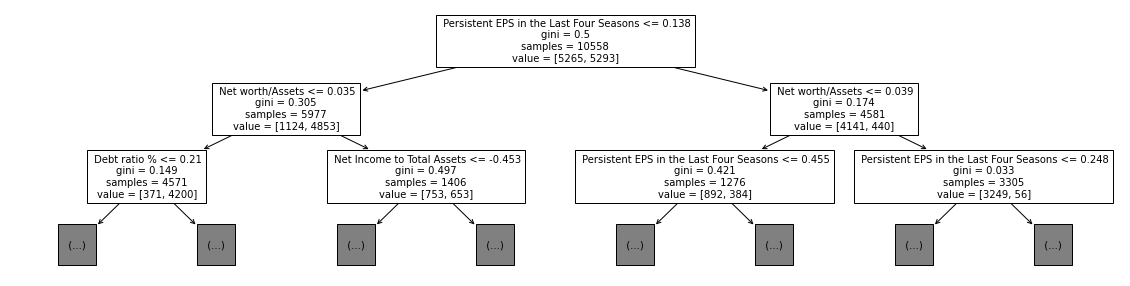

In [ ]:
# See the decision tree
plt.figure(figsize=(20,5))
plot_tree(dt, max_depth=2, fontsize=10, feature_names=X_train.columns) 
plt.show()

The decision tree shows the process of predicting whether a company is going to go bankruptcy step by step using the 10 selected features.

## Random Forest

In [ ]:
# Random Forests

rf = RandomForestClassifier(n_estimators = 50,random_state=42)

rf.fit(X_train, y_train)

y_predrf = rf.predict(X_valid)

# Making the Confusion Matrix
cmrf = confusion_matrix(y_valid, y_predrf)
print(cmrf)

# Accuracy
print("Accuracy is ", accuracy_score(y_valid,y_predrf)*100)

[[592  43]
 [ 16 669]]
Accuracy is  95.53030303030303


We can see that the accuracy of a Random Forest model to prediction is even better. This may be becasue that Random Forests model can better identify features' importance through assessing its performance on subsets of data.

In [ ]:
# fine-tune the Random Forest model using GridSearch

param_grid = [
    {'n_estimators': [10, 30, 50], 'max_features': ['auto', 4, 6, 8],'random_state':[42]},
    {'bootstrap': [False], 'n_estimators': [10, 30, 50], 'max_features': ['auto', 4, 6, 8],'random_state':[42]}
]

grid_forest = GridSearchCV(rf, param_grid, cv=5,
                          scoring='accuracy',
                          return_train_score=True)

grid_forest.fit(X_train, y_train)

grid_forest.best_params_

{'bootstrap': False,
 'max_features': 'auto',
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
# check all the GridSearch results

cvres = grid_forest.cv_results_

for gridsearch_accuracy_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(gridsearch_accuracy_score, params)


0.9435497950849088 {'max_features': 'auto', 'n_estimators': 10, 'random_state': 42}
0.9491378583322568 {'max_features': 'auto', 'n_estimators': 30, 'random_state': 42}
0.9486641940484907 {'max_features': 'auto', 'n_estimators': 50, 'random_state': 42}
0.9444027855533067 {'max_features': 4, 'n_estimators': 10, 'random_state': 42}
0.9486645529190533 {'max_features': 4, 'n_estimators': 30, 'random_state': 42}
0.9489483298164018 {'max_features': 4, 'n_estimators': 50, 'random_state': 42}
0.9442131224609908 {'max_features': 6, 'n_estimators': 10, 'random_state': 42}
0.9474334923129926 {'max_features': 6, 'n_estimators': 30, 'random_state': 42}
0.9477173140691615 {'max_features': 6, 'n_estimators': 50, 'random_state': 42}
0.9443076848542269 {'max_features': 8, 'n_estimators': 10, 'random_state': 42}
0.9468652656359904 {'max_features': 8, 'n_estimators': 30, 'random_state': 42}
0.9474332680188908 {'max_features': 8, 'n_estimators': 50, 'random_state': 42}
0.9476225722406442 {'bootstrap': Fals

Checked that when parameters 'bootstrap'= False, 'max_features'= 'auto', 'n_estimators'= 50 and 'random_state'= 42, the model has the largest accuracy score(95.056%)

In [ ]:
# check what particularly works in the 'best model'

feature_importances = grid_forest.best_estimator_.feature_importances_

# attach names to each of the features
attributes = X_train.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.17111685272115257, ' Persistent EPS in the Last Four Seasons'),
 (0.15902234512654478, ' Net Income to Total Assets'),
 (0.1272057268056115, ' Retained Earnings to Total Assets'),
 (0.11041869070063609, ' ROA(B) before interest and depreciation after tax'),
 (0.10276763722523657, ' Net worth/Assets'),
 (0.0903144698815091, ' Debt ratio %'),
 (0.08673031804199668, ' Net profit before tax/Paid-in capital'),
 (0.0683508180644228, ' Per Share Net profit before tax (Yuan ¥)'),
 (0.04437303791327464, ' ROA(A) before interest and % after tax'),
 (0.039700103519615254,
  ' ROA(C) before interest and depreciation before interest')]

With this extra bit of code we can see that the most important features that used for prediction in the best model.

In [ ]:
# Now we use the test dataset to check for overfitting
final_model = grid_forest.best_estimator_

final_predictions = final_model.predict(X_test)

#Acccuracy
print("Accuracy is ", accuracy_score(y_test,final_predictions)*100)



Accuracy is  95.3030303030303


The high accuracy score indicates that there is no overfitting in the model as the model still predicts well for the test data.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, final_predictions, average='weighted')

0.9530706573210668

F1 score is used to measure model performance by calculating the harmonic mean of precision and recall for the minority positive class. A higher F1 score is, the better model is.

## More Advanced Classifier Models

### Support Vector Machine



In [ ]:
# SVM Regression

svc = SVC(kernel = 'linear', C = 2.0, random_state=1)

svc.fit(X_train, y_train)
# using our model to predict
y_predsvc = svc.predict(X_valid)

# Making the Confusion Matrix
cmsvc = confusion_matrix(y_valid, y_predsvc)
print(cmsvc)

# Number of wrong classfier
print('# of wrong classfiers：%d' % (y_predsvc != y_valid).sum())

# Accuracy
print("Accuracy is ", accuracy_score(y_valid,y_predsvc)*100)

[[567  68]
 [ 50 635]]
# of wrong classfiers：118
Accuracy is  91.06060606060606


### Gradient Boosting

In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb.fit(X_train, y_train)

# using our model to predict
y_predgb = gb.predict(X_valid)

# Making the Confusion Matrix
cmgb = confusion_matrix(y_valid, y_predgb)
print(cmgb)

# Number of wrong classfier
print('# of wrong classfiers：%d' % (y_predgb != y_valid).sum())

# Accuracy
print("Accuracy is ", accuracy_score(y_valid,y_predgb)*100)


[[568  67]
 [ 35 650]]
# of wrong classfiers：102
Accuracy is  92.27272727272727


### XG Boosting

In [ ]:
# XG Boosting
xg = XGBClassifier(n_estimators=100, random_state=42)

xg.fit(X_train, y_train)

# using our model to predict
y_predxg = xg.predict(X_valid)
# Making the Confusion Matrix
cmxg = confusion_matrix(y_valid, y_predxg)
print(cmxg)

# Number of wrong classfier
print('# of wrong classfiers：%d' % (y_predxg != y_valid).sum())

# Accuracy
print("Accuracy is ", accuracy_score(y_valid,y_predxg)*100)


[[562  73]
 [ 30 655]]
# of wrong classfiers：103
Accuracy is  92.1969696969697


### Ensemble Modelling

>DT 0.926 (0.009)
>RF 0.952 (0.005)
>SVC 0.903 (0.008)
>GB 0.924 (0.008)
>XGB 0.921 (0.007)
>hard_voting 0.930 (0.007)


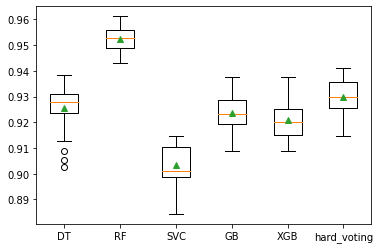

In [ ]:
def get_voting():
    # define base models
    models = list()
    models.append(('DT',DecisionTreeClassifier(max_depth=30,random_state=1)))
    models.append(('RF',RandomForestClassifier(bootstrap = False, max_features = 4, n_estimators = 50, random_state=42)))
    models.append(('SVC',SVC(kernel = 'linear', C = 2.0, random_state=1)))
    models.append(('GB',GradientBoostingClassifier(n_estimators=100, random_state=42)))
    models.append(('XGB',XGBClassifier(n_estimators=100, random_state=42)))

    enemble = VotingClassifier(estimators=models,voting='hard')  # use hard voting

    return enemble


def get_model():
    # get all models
    models = dict()
    models['DT'] = DecisionTreeClassifier(max_depth=30,random_state=1)
    models['RF'] = RandomForestClassifier(bootstrap = False, max_features = 4, n_estimators = 50, random_state=42)
    models['SVC'] = SVC(kernel = 'linear', C = 2.0, random_state=1)
    models['GB'] = GradientBoostingClassifier(n_estimators=100, random_state=42)
    models['XGB'] =XGBClassifier(n_estimators=100, random_state=42)
    models['hard_voting'] = get_voting()

    return models


def evaluate_model(model, X, y):
    # evaluate models
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
    return score

models = get_model()
results, names = list(), list()
for name,model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Cross Validation Scores is used to determine whether the given models are optimal. We noticed that hard_voting model is above the average level of all models, only inferior to the Random Forest model. Finally, test our final voting model with the test data.

###Hard Voting

A voting classifier is a machine learning model that learns from an ensemble of several models and forecasts an output (class) based on the highest probability by all given classifiers' predictions.


In [ ]:
# hard_voting model
models=get_model()
hv = models['hard_voting']
hv.fit(X_test,y_test)

# using hard_voting model to predict
y_predhv = hv.predict(X_test)

# Making the Confusion Matrix
cmhv = confusion_matrix(y_test, y_predhv)
print(cmhv)

# Number of wrong classfier
print('# of wrong classfiers：%d' % (y_predhv != y_test).sum())

# Accuracy
print("Accuracy is ", accuracy_score(y_test,y_predhv)*100)


[[664  35]
 [  6 615]]
# of wrong classfiers：41
Accuracy is  96.8939393939394


The accuracy of predicting for the test data is 96.81%, which is the highest among all the models we fit, indicating that the hard_voting model is the best model for prediction.

In [ ]:
f1_score(y_test, y_predhv, average='weighted')

0.9689647601155884

# Part 3 Deep Learning

### Pre-Processing

Regarding the analysis of the Deep Learning architecture, the most important feature of the dataset that must be taken into great consideration is the imbalanced set of bankruptcies. As the event of a bankruptcy is pretty “rare” the dataset should incorporate some method of over/under-sampling or both, knowing that given the balanced focus on misclassification errors, most standard neural network algorithms are not well suited to datasets with a severely skewed class distribution.

The structure of the DL architecture that was implemented is displayed along with commentary about the reasoning and choices that were made.


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# standard quantitative packages
import numpy as np
import pandas as pd

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# tensorflow and keras for deep learning
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv('data.csv')
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


From the descriptive statistics we notice that our dataset is regularized with each column obtaining values between min:0 and max:1 .
The dataset is rich in terms of features spanning through 95 different metrics for determining the bankruptcy of a company.

The next step is to split the data into the training and test sets. 

Note: We could also (optionaly) introduce the “random_state” input in the “train_test_split” command to have reproductivity of the results. (set seed for the “random” splits)


In [ ]:
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

A popular library in the Scikit-learn module to select the “best” features of a given dataset is SelectKbest . The SelectKBest method selects the features according to the K highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting the most important features is a critical process when we prepare a large dataset for training.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

Import additional packages/module
The choice of 20 most important features was our target, as a consensus view, enough to predict the bankruptcies observed.


In [ ]:
feature_selection=SelectKBest(f_classif,k=20).fit(X_train,y_train) # k number of specified features
selected_features=X_train.columns[feature_selection.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
selected_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Current Liability to Assets',
       ' Retained Earnings to Total Assets',
       ' Current Liability to Current Assets', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity'],
      dtype='object')

The selected features have been also used in the analysis part (1).However, the result is slightly different as we use the standardized dataset in part 1) 

### Simple Deep Learning Network

For our first approach, a simple DL network will be presented without taking any account of the imbalanced set to set the basis and see how a simple Sequential model will behave. 

The DL network model will be a Sequential model with 2 dense layers, both with activation functions ‘ReLu’ (Rectify Linear) and an output layer with the sigmoid activation function to ensure predictions are probabilities in the range [0,1].
Stochastic gradiend decent will be used as the fitting optimizer and the loss function will be “binary crossentropy” as the best choice for the classification problem.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(20,)),
    keras.layers.Dense(33, activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [ ]:
X_train = X_train[selected_features]

In [ ]:
X_valid = X_valid[selected_features]

In [ ]:
X_test = X_test[selected_features]

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
171/171 [==============================] - 1s 3ms/step - loss: 0.3849 - accuracy: 0.9148 - val_loss: 0.1797 - val_accuracy: 0.9692
Epoch 2/30
171/171 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9672 - val_loss: 0.1356 - val_accuracy: 0.9692
Epoch 3/30
171/171 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9672 - val_loss: 0.1323 - val_accuracy: 0.9692
Epoch 4/30
171/171 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9672 - val_loss: 0.1319 - val_accuracy: 0.9692
Epoch 5/30
171/171 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9672 - val_loss: 0.1318 - val_accuracy: 0.9692
Epoch 6/30
171/171 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9672 - val_loss: 0.1317 - val_accuracy: 0.9692
Epoch 7/30
171/171 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9672 - val_loss: 0.1316 - val_accuracy: 0.9692
Epoch 

In [ ]:
score = model.evaluate(X_test ,y_test, batch_size = 128)

6/6 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9707


The validation accuracy achieved is around 97.07%. 

The accuracy of the network is evaluated on the test dataset at a value of 96.92%.


### Weighted/Cost sensitive Deep Learning Network

The backpropagation method that neural networks use in their training process, poses a limitation of this method, as examples from each class are treated with the same weights, which for imbalanced datasets means that the model is adapted a lot more for one class than another.
The backpropagation algorithm can be modified based on misclassification errors in proportion to the importance of the class, referred to as weighted neural networks or cost-sensitive neural networks. This has the effect of allowing the model to account with greater impact on cases from the minority class than the majority class in datasets which are severely skewed.

The implemented method for our DL architecture was based on the example found here:
(https://machinelearningmastery.com/cost-sensitive-neural-network-for-imbalanced-classification/)


Assign weights for each class on a scale from 1 to 100. 

The class distribution of the test dataset is a 1:100 ratio for the minority class to the majority class. The reduction of the error from the majority class is dramatically scaled down to very small numbers that may have limited or only a very minor effect on model weights.


In [ ]:
class_weight = {0: 1.,
                1: 100.}

As before, the architecture of the network will be the same.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(20,)),
    keras.layers.Dense(33, activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

The train and validation sets will be reduced to the appropriate sizes based on the most important features selected by the “SelectKbest” method presented before. The number of epochs chosen is 30. 

In [ ]:
X_train = X_train[selected_features]

In [ ]:
X_valid = X_valid[selected_features]

In [ ]:
X_test = X_test[selected_features]

This time in the fitting command we will introduce the class weights as discussed above.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, class_weight=class_weight, validation_data=(X_valid, y_valid))

Epoch 1/30
171/171 [==============================] - 1s 3ms/step - loss: 2.3792 - accuracy: 0.0328 - val_loss: 1.3304 - val_accuracy: 0.0308
Epoch 2/30
171/171 [==============================] - 0s 2ms/step - loss: 2.2806 - accuracy: 0.0328 - val_loss: 1.4622 - val_accuracy: 0.0308
Epoch 3/30
171/171 [==============================] - 0s 2ms/step - loss: 2.2535 - accuracy: 0.0328 - val_loss: 1.5371 - val_accuracy: 0.0308
Epoch 4/30
171/171 [==============================] - 0s 2ms/step - loss: 2.1841 - accuracy: 0.0328 - val_loss: 1.3902 - val_accuracy: 0.0308
Epoch 5/30
171/171 [==============================] - 0s 2ms/step - loss: 2.0801 - accuracy: 0.0328 - val_loss: 1.0931 - val_accuracy: 0.0308
Epoch 6/30
171/171 [==============================] - 0s 2ms/step - loss: 1.9537 - accuracy: 0.0328 - val_loss: 1.0665 - val_accuracy: 0.0308
Epoch 7/30
171/171 [==============================] - 0s 2ms/step - loss: 1.7743 - accuracy: 0.1652 - val_loss: 0.9466 - val_accuracy: 0.3035
Epoch 

In [ ]:
score = model.evaluate(X_test ,y_test, batch_size = 128)

6/6 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7214


The validation accuracy achieved is around 71.55%. 

The accuracy of the network is evaluated on the test dataset at a value of 65.2%.


The accuracy of this cost sensitive neural network is given by the ROC-AUC (Receiver Operating Characteristic Curve - Area Under Curve) score which is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [ ]:
yhat = model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, yhat)

In [ ]:
print('ROC AUC: %.3f' % score)

ROC AUC: 0.927


### Hyper-Parametrization

As a final part we will also present a useful Keras library that would provide another approach to our classification problem. The Keras Tuner is a library that helps pick the optimal set of hyperparameters for TensorFlow. The process of selecting the right set of hyperparameters for the machine learning architecture is called “hyper parameter tuning”. 
The model build is a sequential model with 2 hidden layers with similar activation functions.


In [ ]:
import keras_tuner as kt

In [ ]:
# install keras_tuner
#import sys
#!{sys.executable} -m pip install keras_tuner

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units',
                             min_value=25,
                             max_value=125,
                             step=25),
                 activation='relu'))
    model.add(keras.layers.Dense(
        hp.Choice('units', [4, 8, 12, 16]),
        activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
    return model

The RandomSearch tuner will be used to manage the hyperparameter search process, including model creation, training, and evaluation.

Note: The directory path should be changed into a new folder directory before runtime.

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    directory='/Users/spyrostsatsis/Desktop/untitled_project',
)

Using the following commands, we will extract again the “best” features for our dataset and train the model through the scope of the hyper parameterization.

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
best_hp=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 4 Complete [00h 00m 05s]
val_accuracy: 0.9692082405090332

Best val_accuracy So Far: 0.9692082405090332
Total elapsed time: 00h 00m 23s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hp.get('units')

75

In [ ]:
nnModel = tuner.hypermodel.build(best_hp)

By introducing the test set to evaluate our model we will also perform an accuracy score to assess the results.

In [ ]:
y_pred = nnModel.predict(X_test)

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
y_test_arr = y_test.to_numpy()

In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test_arr, y_pred)

0.9706744868035191

The achieved accuracy score is about 97.4%.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_arr, y_pred, average='weighted')

0.9562299259879905

# Summary

In this coursework, we have used correlation coefficient and SelectedKbest machine learning model to find most significant features to used in company bankruptcy prediction. 

Secondly, We have mananged to use different classifiers to find a good model in company bankruptcy prediction. We have found that Random Forest model provides F1 score 0.9531 and Hard voting model provides F1 score 0.9690. This suggest that Hard Voting model is better at predicting company bankruptcy. 

Finally, we have combined hyper-parametrization and learning model to predict the company bankruptcy, which provides F1 score 0.9562. 

Therefore, we can say that Hard voting model is a good model for company bankruptcy predictions. However, we believe that if increase the number of hidden layers in the deep learning will give us a higher result. 